# 911 Calls Capstone Project


For this capstone project we will be analyzing some 911 from Kaggle. The data contains the following fields.

* lat: String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable,Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)




## Data and Setup


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
## READ the Dataset 

df = pd.read_csv('911.csv')

In [3]:
# info
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Basic Questions

** What are the top 5 zipcodes for 911 calls?**

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls?**

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Create new features

In [7]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** What is the most commons Reason for a 911 call based off of this new column?**

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

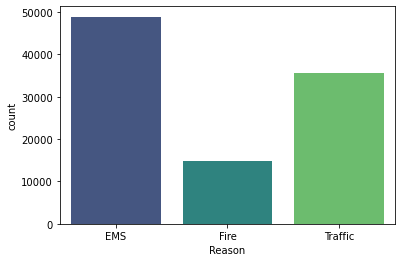

In [11]:
sns.countplot(x='Reason', data=df, palette='viridis')

In [12]:
# convert timestamp to pd.to_datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Weeks is an integer 0-6. Use .map() with this dictionary to map the actual string names to the day of the week.**

In [14]:
# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}


In [15]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Lets use sns.countplot of the Day of Week column with the hue based off of the Reason column.

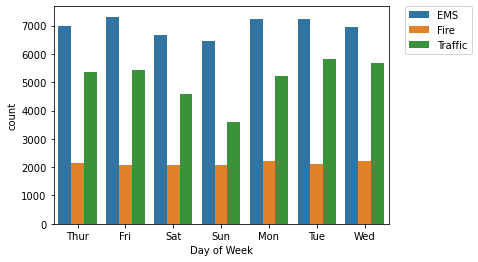

In [18]:
sns.countplot(x='Day of Week',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

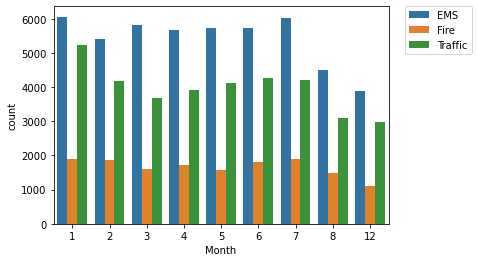

In [20]:
# Now create countplot for Month
sns.countplot(x='Month', data=df, hue='Reason')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 From the countplot, some of the months are missing, 9,10,11.
 
 ** Now create a groupby object called byMonth, where you group the DataFrame by the month column and us the count() method for aggregation.

In [21]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

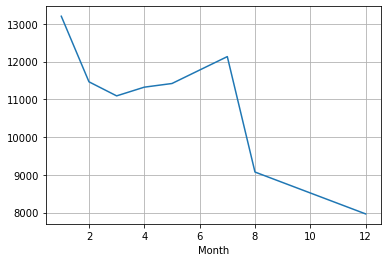

In [22]:
# Create a line plot for the byMonth dataframe
byMonth['twp'].plot(grid=True)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

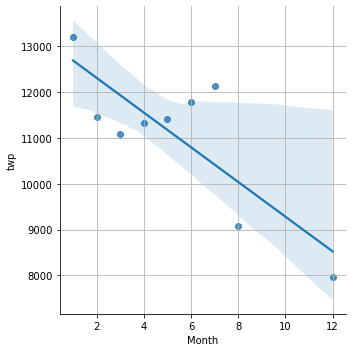

In [24]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())
plt.grid()

** Create a new column called 'Date' that  contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [25]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

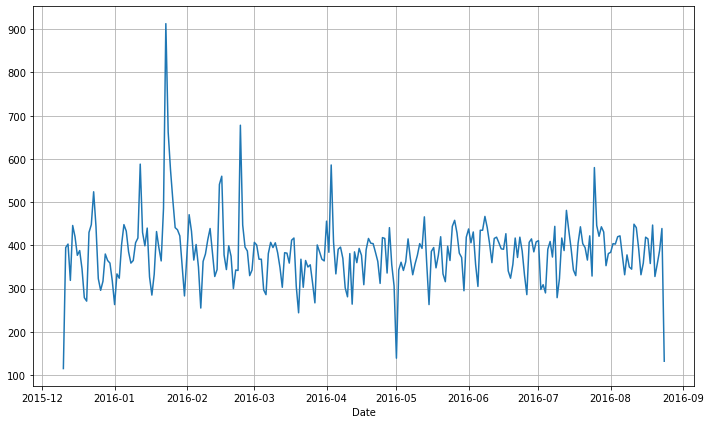

In [30]:
# Now groupby this Data column with the count() aggregate and create a plot of counts 911 calls
plt.figure(figsize=(10,6))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.grid()


** Now recreate this plot but create 3 separate plots with each plot representing a  Reason for the 911 cals

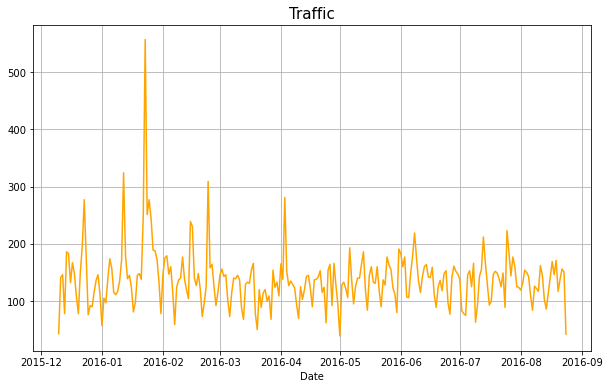

In [39]:
plt.figure(figsize=(10,6))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(color='orange')
plt.title('Traffic', size=15)
plt.tight_layout
plt.grid()

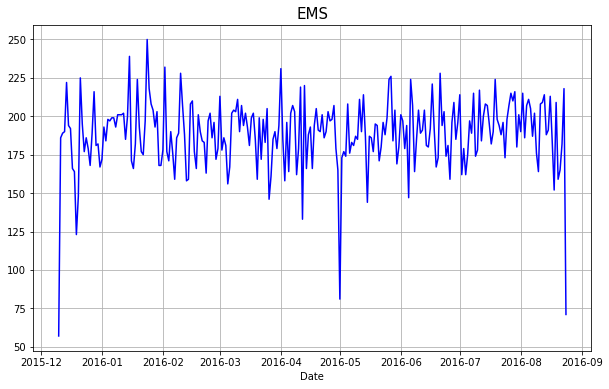

In [37]:
plt.figure(figsize=(10,6))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(color='blue')
plt.title('EMS', size=15)
plt.tight_layout
plt.grid()

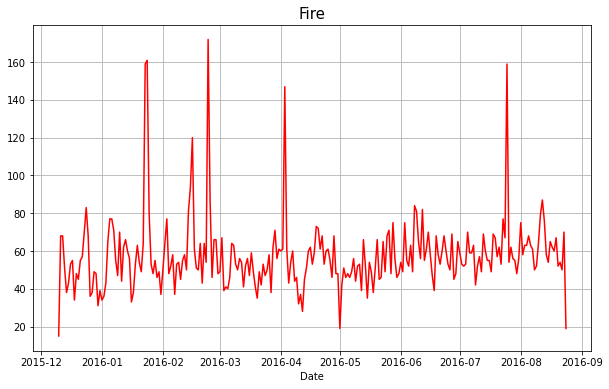

In [38]:
plt.figure(figsize=(10,6))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(color='red')
plt.title('Fire', size=15)
plt.tight_layout
plt.grid()

In [41]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

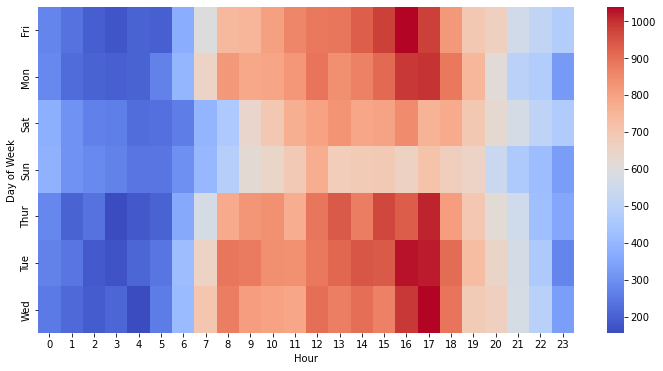

In [42]:
## Create heatmap for the new dataFrame

plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='coolwarm')

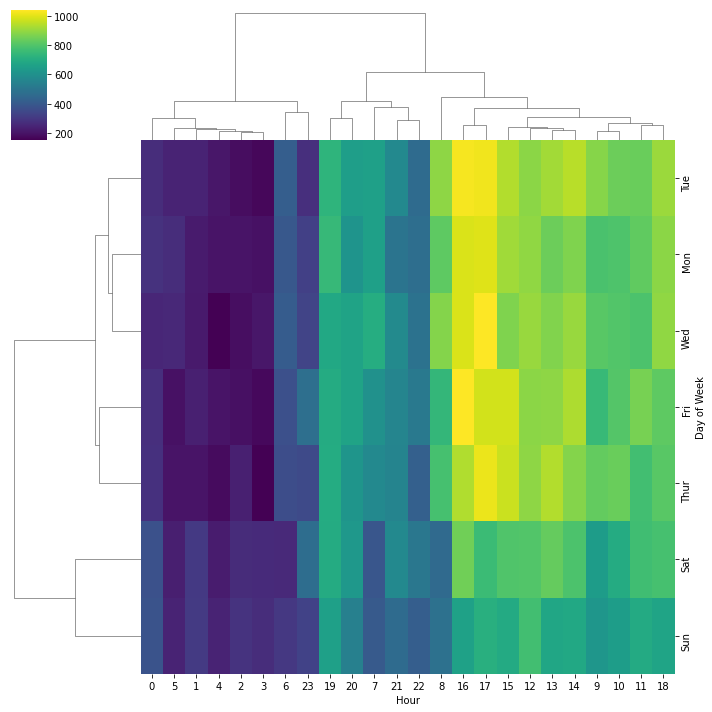

In [43]:
sns.clustermap(dayHour,cmap='viridis')

In [45]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

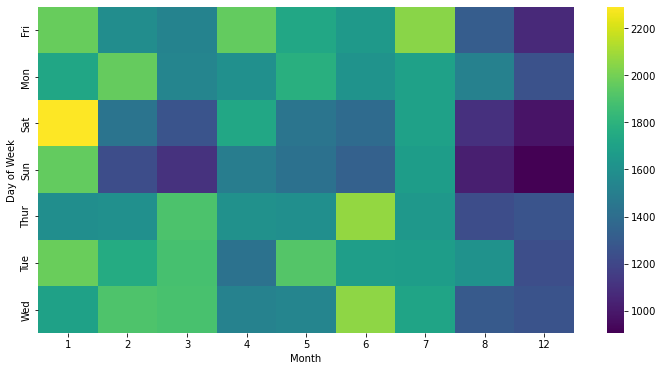

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')


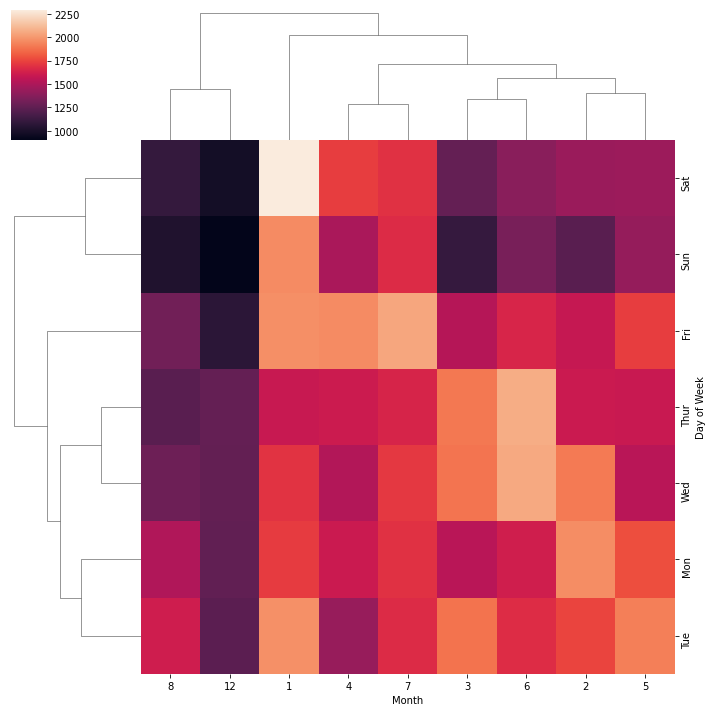

In [52]:
sns.clustermap(dayMonth)